<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [63]:
clients = [8, 4, 9, 6, 7, 1, 6, 8, 9, 10]
def CSI_sort(clients):
    new_list = sorted(clients)
    max_grade = []
    for elem in new_list:
        if elem not in max_grade:
            max_grade.append(elem)
    return max_grade[-3:]
CSI_sort(clients)

[8, 9, 10]

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [65]:
path = '/data/dst-3.0_16_1_hh_database.csv'
hh_data = pd.read_csv(path, sep=';')

# ответ на задание 2.1
print(f'Размерность таблицы: {hh_data.shape}')

Размерность таблицы: (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [66]:
hh_data

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [67]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [68]:
# ответ на задание 2.4
cols_pass = hh_data.isnull().sum()
cols_with_pass = cols_pass[cols_pass > 0].sort_values(ascending=False)
print('Колонки с пустыми значениями:')
print(cols_with_pass)

Колонки с пустыми значениями:
Опыт работы                        168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [69]:
# ответ на задание 2.4
exp_uniq = hh_data['Опыт работы'].nunique()
print(f'В столбце "Опыт работы" {exp_uniq} уникальных значений')

hh_data.describe()

В столбце "Опыт работы" 44413 уникальных значений


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [70]:
# определяем функцию возвращающую уровень образования
def education_cut(education_string):
    """[выделяем уровень образования, записывая первые два слова в стоку,
    затем сравнивая с возможными вариантами возвращаем соответствующее значение]

    Args:
        education_string ([string]): [признак "Образование и ВУЗ"]

    Returns:
        [string]: [уровень образования]
    """
    education_type = ' '.join(education_string.split()[0:2])
    if education_type == 'Высшее образование':
        return 'высшее'
    if education_type == 'Неоконченное высшее':
        return 'неоконченное высшее'
    if education_type == 'Среднее специальное':
        return 'среднее специальное'
    if education_type == 'Среднее образование':
        return 'среднее'

# создаём признак "Образование", и удаляем "Образование и ВУЗ"
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education_cut)
hh_data.drop('Образование и ВУЗ', axis=1, inplace=True)

# ответ на задание 3.1
schooling = hh_data['Образование'].value_counts()[3]
print(f'Соискателей имеющих среднее образование всего {schooling} человек')

Соискателей имеющих среднее образование всего 559 человек


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [71]:
# определяем функцию возвращающую значение возраста
def get_age(data_string):
    """[Выкидывая пол, выделяем возраст в переменную.
    И отбрасывая слово "лет", приводим к целочисленному типу]

    Args:
        data_string ([string]): ["Пол, возраст"]

    Returns:
        [int]: [возраст]
    """
    # выделяем возраст в переменную
    age = data_string.split(',')[1]
    return int(age.split()[0])

# создаём признаки "Пол" и "Возраст", и удаляем "Пол, возраст"
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x[0])
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
hh_data.drop('Пол, возраст', axis=1, inplace=True)

# ответ на задание 3.2
percent_female = hh_data['Пол'].value_counts(normalize=True)[1]
mean_age = hh_data['Возраст'].mean()
print(f'Процент женских резюме составляет: {round(percent_female*100, 2)}')
print(f'Средний возраст соискателей составляет: {round(mean_age, 1)} года')

Процент женских резюме составляет: 19.07
Средний возраст соискателей составляет: 32.2 года


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [72]:
# определяем функцию возвращающую количество месяцев опыта работы
def to_months(data_string):
    """[Возвращаем NaN, если значеие пропущено или не указано.
    Выделяем данные с опытом работы в список, и сохраняем в
    переменные количество лет и месяцев.
    Возвращаем опыт работы выраженный в месяцах.]

    Args:
        data_string ([string]): [признак "опыт работы"]

    Returns:
        [int]: [общий опыт работы в месяцах]
        [NaN]: [пропущенные значения]
    """
    if data_string is np.nan or data_string == 'Не указано':
        return np.nan
    experience = data_string.split()
    years_words = ['лет', 'год', 'года']
    months_words = ['месяц', 'месяца', 'месяцев']
    years = 0
    months = 0
    if experience[3] in years_words:
        years = int(experience[2])
    if experience[3] in months_words:
        months = int(experience[2])
    elif experience[5] in months_words:
        months = int(experience[4])
        
    return years*12 + months

# создаём признак "Опыт работы (месяц)", и удаляем "Опыт работы"
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(to_months)
hh_data.drop('Опыт работы', axis=1, inplace=True)

# ответ на задание 3.3
experience_median = round(hh_data['Опыт работы (месяц)'].median())
print(f'Медианный опыт работы соискателей составляет: {experience_median} месяцев')

Медианный опыт работы соискателей составляет: 100 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [73]:
# определяем функцию возвращающую значение признака "Город"
def get_city(data_string):
    """[Выделяем название города, чистим его от пробелов,
    и возвращаем соответствующее название категории]

    Args:
        data_string ([string]): [значение ризнака 'Город, переезд, командировки']

    Returns:
        [string]: [значение признака "Город"]
    """
    city = data_string.split(',')[0].replace(' ', '')
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    if city in million_cities:
        return 'город-миллионник'
    elif city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'другие'

# определяем функцию возвращающую готовность соискателя к переезду
def get_moving(data_string):
    """[проверяем на наличие готовности к переезду,
    и возвращаем соответствующее булевое значение]

    Args:
        data_string ([string]): [значение ризнака 'Город, переезд, командировки']

    Returns:
        [bool]: [готовность соискателя к переезду]
    """
    male_not_ready = 'не готов к переезду' in data_string
    female_not_ready = 'не готова к переезду' in data_string    
    if male_not_ready or female_not_ready:
        return False
    else:
        return True

# определяем функцию возвращающую готовность соискателя к командировкам
def get_mission_readiness(data_string):
    """[проверяем на неготовность к командировкам, потом на готовность,
    а в остальных случаях будут пропуски, которые мы будем считать не готовностью]

    Args:
        data_string ([string]): [значение ризнака 'Город, переезд, командировки']

    Returns:
        [bool]: [готовность соискателя к командировкам]
    """
    ready_list = ['готов к командировкам',
             'готова к командировкам',
             'готов к редким командировкам',
             'готова к редким командировкам']
    male_not_ready = 'не готов к командировкам' in data_string
    female_not_ready = 'не готова к командировкам' in data_string
    if male_not_ready or female_not_ready:
        return False
    for readines in ready_list:
        if readines in data_string:
            return True
    return False

# создаём признаки 'Город', 'Готовность к переезду', 'Готовность к командировкам'
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_moving)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_mission_readiness)

hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)

# ответ на задание 3.4
peterburg_applicants = hh_data['Город'].value_counts(normalize=True)[3]
print(f'В Санкт-Петербурге живёт {round(peterburg_applicants*100)} % соискателей')
mask_moving_readines = (hh_data['Готовность к переезду'] == True) \
                     & (hh_data['Готовность к командировкам'] == True)
moving_readiness = hh_data[mask_moving_readines].shape[0]*100 / hh_data.shape[0]
print(f'Всего готовых к переездам и командировкам {round(moving_readiness)} % соискателей')

В Санкт-Петербурге живёт 11 % соискателей
Всего готовых к переездам и командировкам 32 % соискателей


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [74]:
# определим функцию возвращающую признак-мигалку
def get_sign_flasher(data_string, sign):
    """[Проверяем вхождение дополнительного аргумента в данных соискателя,
    и возвращаем соответствующее логическое значение]

    Args:
        data_string ([string]): [значение признака к которому применяется функция]
        sign ([string]): [название признака-мигалки]

    Returns:
        [bool]: [логическое значение признака-мигалки]
    """
    if sign in data_string:
        return True
    else:
        return False

# создаём признаки-мигалки
hh_data['полная занятость'] = hh_data['Занятость'].apply(get_sign_flasher,
                                                         sign='полная занятость')
hh_data['частичная занятость'] = hh_data['Занятость'].apply(get_sign_flasher,
                                                            sign='частичая занятость')
hh_data['проектная работа'] = hh_data['Занятость'].apply(get_sign_flasher,
                                                         sign='проектная работа')
hh_data['стажировка'] = hh_data['Занятость'].apply(get_sign_flasher,
                                                   sign='стажировка')
hh_data['волонтерство'] = hh_data['Занятость'].apply(get_sign_flasher,
                                                     sign='волонтерство')
hh_data['гибкий график'] = hh_data['График'].apply(get_sign_flasher,
                                                      sign='гибкий график')
hh_data['полный день'] = hh_data['График'].apply(get_sign_flasher,
                                                    sign='полный день')
hh_data['сменный график'] = hh_data['График'].apply(get_sign_flasher,
                                                       sign='сменный график')
hh_data['вахтовый метод'] = hh_data['График'].apply(get_sign_flasher,
                                                       sign='вахтовый метод')
hh_data['удалённая работа'] = hh_data['График'].apply(get_sign_flasher,
                                                         sign='полная занятость')

hh_data.drop('Занятость', axis=1, inplace=True)
hh_data.drop('График', axis=1, inplace=True)

# ответ на задание 3.5
mask_employment = (hh_data['волонтерство'] == True) \
                & (hh_data['проектная работа'] == True)
print(f'Ищут проектную работу или волонтёрство {hh_data[mask_employment].shape[0]} человек')
mask_schedule = (hh_data['вахтовый метод'] == True) \
              & (hh_data['гибкий график'] == True)
print(f'Хотят работать вахтовым методом или с гибким графиком {hh_data[mask_schedule].shape[0]} человек')

Ищут проектную работу или волонтёрство 436 человек
Хотят работать вахтовым методом или с гибким графиком 2311 человек


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [75]:
# определяем функцию возвращающую наименование валюты в стандарте ISO
def get_currency(data_string):
    """[функция проверяет вхождение образца наименования валюты в данных,
    и возвращает соответствующее наименование валюты в стандарте ISO]

    Args:
        data_string ([string]): [значение ризнака 'ЗП']

    Returns:
        [string]: [наименование валюты в стандарте ISO]
    """
    
    if 'бел' in data_string:
        return 'BYN'
    if 'руб' in data_string:
        return 'RUB'
    if 'грн' in data_string:
        return 'UAH'
    if 'USD' in data_string:
        return 'USD'
    if 'EUR' in data_string:
        return 'EUR'
    if 'KGS' in data_string:
        return 'KGS'
    if 'сум' in data_string:
        return 'UZS'
    if 'AZN' in data_string:
        return 'AZN'
    if 'KZT' in data_string:
        return 'KZT'
    
# определим функцию возвращающую сумму желаемой заработной платы
def get_wages(data_string):
    """[функция добавляет только цифры в список. Затем соединяет в одно число,
    и возвращает целочисленное значение суммы желаемой заработной платы]

    Args:
        data_string ([string]): [значение ризнака 'ЗП']

    Returns:
        [int]: [сумма желаемой заработной платы]
    """
    digits_list = []
    for ch in data_string:
        if ch.isdigit():
            digits_list.append(ch)
    wages = ''.join(digits_list)
    return int(wages)

# записываем дата фрейм в переменную exchange
path_rate = '/home/sergey/Проекты/projekt_1/data/ExchangeRates.csv'
exchange = pd.read_csv(path_rate)

# в признаках 'Обновление резюме' и 'date' выделяем дату
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
exchange['date'] = pd.to_datetime(exchange['date']).dt.date

# создаём признак 'валюта'
hh_data['валюта'] = hh_data['ЗП'].apply(get_currency)
hh_data['ЗП'] = hh_data['ЗП'].apply(get_wages)

# объединим два датасета в один
hh_df = hh_data.merge(
    exchange,
    left_on=['валюта', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how = 'left'
)
# заполним пропуски значением "1"
hh_df['close'] = hh_df['close'].fillna(1)
hh_df['proportion'] = hh_df['proportion'].fillna(1)

# создаём признак 'ЗП (руб)' и удаляем ненужные признаки из обменника
hh_df['ЗП (руб)'] = hh_df['ЗП'] * hh_df['close'] / hh_df['proportion']
hh_df.drop('ЗП', axis=1, inplace=True)
hh_df.drop('currency', axis=1, inplace=True)
hh_df.drop('per', axis=1, inplace=True)
hh_df.drop('date', axis=1, inplace=True)
hh_df.drop('time', axis=1, inplace=True)
hh_df.drop('vol', axis=1, inplace=True)
hh_df.drop('close', axis=1, inplace=True)
hh_df.drop('proportion', axis=1, inplace=True)

# ответ на задание 3.6
median_sallary = hh_df['ЗП (руб)'].median()
print(f'Медианная зарплата соискателей составляет {round(median_sallary/1000)} тысяч рублей')

Медианная зарплата соискателей составляет 59 тысяч рублей


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Модальное значение возраста соискателей составляет: 30 лет


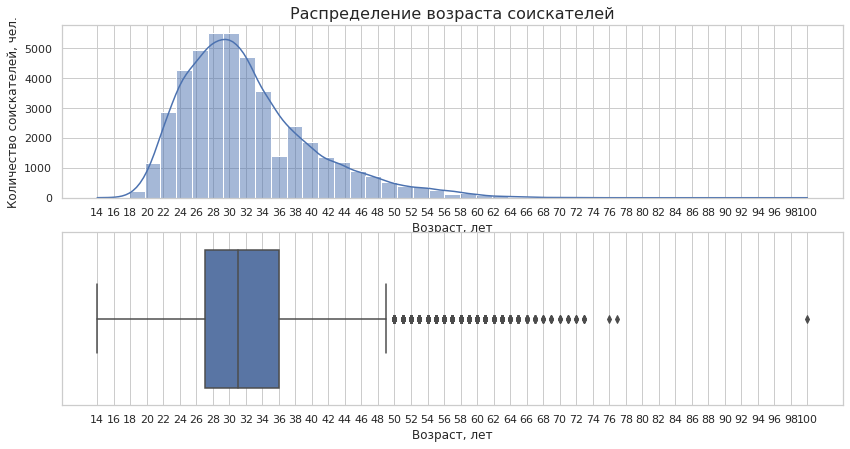

In [76]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
axes[0].set_title('Распределение возраста соискателей', fontsize=16);
hist1 = sns.histplot(
    data=hh_df,
    x='Возраст',
    bins=45,
    kde=True,
    ax=axes[0]
);
hist1.set_xlabel('Возраст, лет', fontsize=12);
hist1.set_ylabel('Количество соискателей, чел.', fontsize=12);
hist1.set_xticks(range(14,102,2));

boxplot1 = sns.boxplot(
    data=hh_df,
    x='Возраст',
    orient='h',
    width=0.8,
    ax=axes[1]
);
boxplot1.set_xlabel('Возраст, лет', fontsize=12);
boxplot1.set_xticks(range(14,102,2));

# ответ на задание 4.1
age_mode = hh_df['Возраст'].mode()[0]
print(f'Модальное значение возраста соискателей составляет: {age_mode} лет')

**Выводы:**

*   Распределение признака "Возраст" уномодально, похоже на нормальное, и имеет правостороннюю ассиметрию;
*   Модальное значение возраста соискателей составляет 30 лет;
*   Предельные значения 14 и 100 лет;
*   Возраст большинства соискателей находятся в интервале примерно от 22 до 35 лет;
*   Можно предположить, что значение 100 лет является выбросом, ошибкой при заполнении данных.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Максимальное значение опыта работы соискателей составляет: 1188 месяцев
Модальное значение опыта работы соискателей составляет: 81 месяц


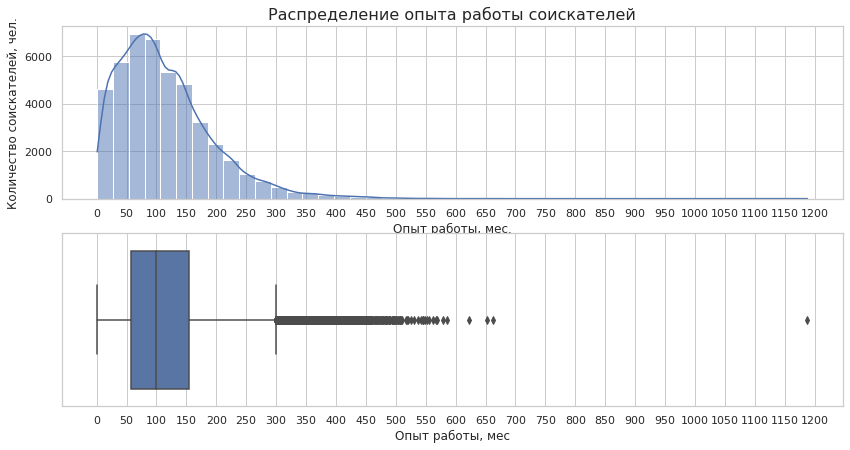

In [77]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
axes[0].set_title('Распределение опыта работы соискателей', fontsize=16);
hist2 = sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    bins=45,
    kde=True,
    ax=axes[0]
);
hist2.set_xlabel('Опыт работы, мес.', fontsize=12);
hist2.set_ylabel('Количество соискателей, чел.', fontsize=12);
hist2.set_xticks(range(0,1250,50));

boxplot2 = sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.8,
    ax=axes[1]
);
boxplot2.set_xlabel('Опыт работы, мес', fontsize=12);
boxplot2.set_xticks(range(0,1250,50));

# ответ на задание 4.2
exp_max = round(hh_df['Опыт работы (месяц)'].max())
print(f'Максимальное значение опыта работы соискателей составляет: {exp_max} месяцев')
exp_mode = round(hh_df['Опыт работы (месяц)'].mode()[0])
print(f'Модальное значение опыта работы соискателей составляет: {exp_mode} месяц')

**Выводы:**

*   Модальное значение опыта работы соискателей составляет 81 месяц;
*   Предельные значения 0 и 1188 месяцев;
*   Опыт работы большинства соискателей находятся в интервале примерно от 0 до 160 месяцев;
*   Можно с уверенностью сказать, что значение 1188 месяцев является выбросом, ошибкой при заполнении данных.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Желаемая зарплата соискателей от 1 до 24304876 руб
Модальное значение желаемой зарплаты соискателей составляет: 50000 руб
Зарплату свыше миллиона рублей желают 5 человек


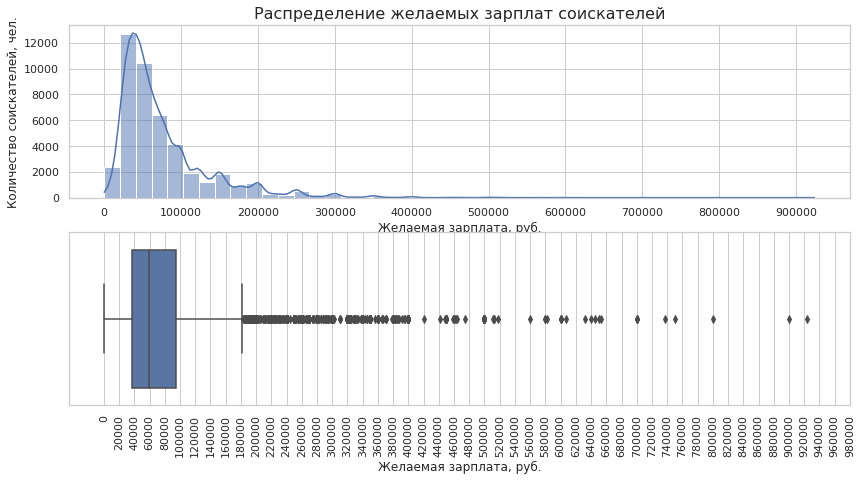

In [78]:
sns.set_style('whitegrid')
# чтобы график был читаемым будем смотреть соискателей меньше миллиона
mask_emissions = hh_df['ЗП (руб)'] < 1000000

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
plt.xticks(rotation=90)
axes[0].set_title('Распределение желаемых зарплат соискателей', fontsize=16);
hist3 = sns.histplot(
    data=hh_df[mask_emissions],
    x='ЗП (руб)',
    bins=45,
    kde=True,
    ax=axes[0]
);
hist3.set_xlabel('Желаемая зарплата, руб.', fontsize=12);
hist3.set_ylabel('Количество соискателей, чел.', fontsize=12);
hist3.set_xticks(range(0, 1000000, 100000));

boxplot3 = sns.boxplot(
    data=hh_df[mask_emissions],
    x='ЗП (руб)',
    orient='h',
    width=0.8,
    ax=axes[1]
);
boxplot3.set_xlabel('Желаемая зарплата, руб.', fontsize=12);
boxplot3.set_xticks(range(0, 1000000, 20000))

# ответ на задание 4.3
sal_min = round(hh_df['ЗП (руб)'].min())
sal_max = round(hh_df['ЗП (руб)'].max())
print(f'Желаемая зарплата соискателей от {sal_min} до {sal_max} руб')
sal_mode = round(hh_df['ЗП (руб)'].mode()[0])
print(f'Модальное значение желаемой зарплаты соискателей составляет: {sal_mode} руб')
over_million = hh_df[hh_df['ЗП (руб)'] > 1000000].shape[0]
print(f'Зарплату свыше миллиона рублей желают {over_million} человек')

**Выводы:**

*   Модальное значение желаемой заработной платы соискателей составляет 50 000 рублей;
*   Предельные значения 1 и 24304876 рублей;
*   Желаемая заработная плата большинства соискателей находятся в интервале примерно от 32 000 до 92 000 рублей;
*   Имея текущий уровень знаний о зарплатах ит, к выбросам я бы отнес все значения больше 500 000 рублей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

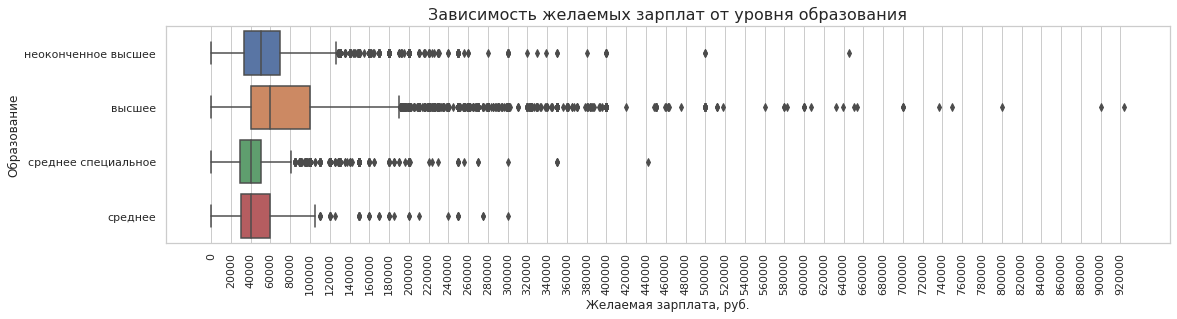

In [79]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(18,4))
plt.xticks(rotation=90)

boxplot4 = sns.boxplot(
    data=hh_df[mask_emissions],
    x='ЗП (руб)',
    y='Образование',
    orient='h',
    width=0.8
);
boxplot4.set_title('Зависимость желаемых зарплат от уровня образования', fontsize=16);
boxplot4.set_xlabel('Желаемая зарплата, руб.', fontsize=12);
boxplot4.set_xticks(range(0, 940000, 20000));

**Выводы:**

*   По графику видно, что соискатели с высшим образованием претендуют на самую высокую зарплату. А со средним образванием - самую низкую;
*   Я считаю, что признак уровня образования важен при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

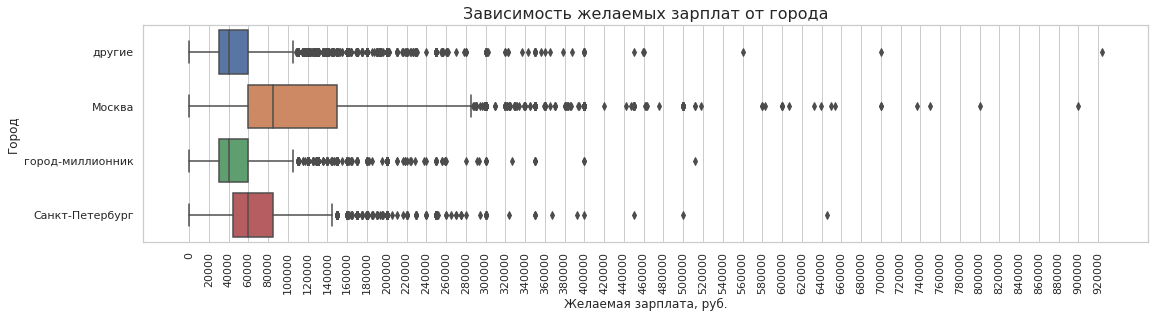

In [80]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(18,4))
plt.xticks(rotation=90)

boxplot4 = sns.boxplot(
    data=hh_df[mask_emissions],
    x='ЗП (руб)',
    y='Город',
    orient='h',
    width=0.8
);
boxplot4.set_title('Зависимость желаемых зарплат от города', fontsize=16);
boxplot4.set_xlabel('Желаемая зарплата, руб.', fontsize=12);
boxplot4.set_xticks(range(0, 940000, 20000));

**Выводы:**

*   По графику видно, что самые высокие желаемые зарплаты соискателей в городе Москва. Медианный уровень заработных плат в Москве составляет 85 000 рублей, а 25% и 75% квартили составляют 60 000 и 150 000 рублей соответственно. На втором месте по уровню заработных плат город "Санкт-Петербург". Медианный уровень заработных плат в Санкт-Петербурге составляет 60 000 рублей, а 25% и 75% квартили составляют 45 000 и 85 000 рублей соответственно. Желаемые зарплаты соискателей из категорий: "город-миллионник", и "другие" находятся на одинаковом уровне, и являются самыми низкими из всех. Их медианная зарплата составляет 40 000 рублей, а 25% и 75% квартили составляют 30 000 и 60 000 рублей соответственно.;
*   Я считаю, что признак "Город" важен при прогнозировании заработной платы.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Медианная зарплата соискателей, готовых и к переезду, и к командировкам составляет 66 тысяч рублей


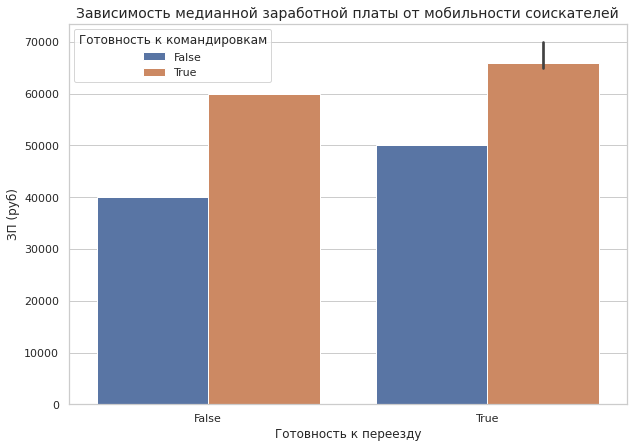

In [81]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10, 7))
barplot1 = sns.barplot(
    data=hh_df,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator=np.median
);

barplot1.set_title('Зависимость медианной заработной платы от мобильности соискателей', fontsize=14);

# ответ на задание 4.6
salary_mobile_median = hh_df[mask_moving_readines]['ЗП (руб)'].median()/1000
print(f'Медианная зарплата соискателей, готовых и к переезду,\
 и к командировкам составляет {round(salary_mobile_median)} тысяч рублей')

По медианным показателям видно, что у готовых к переезду и готовых к командировкам желаемая зарплата выше, чем у не готовых.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

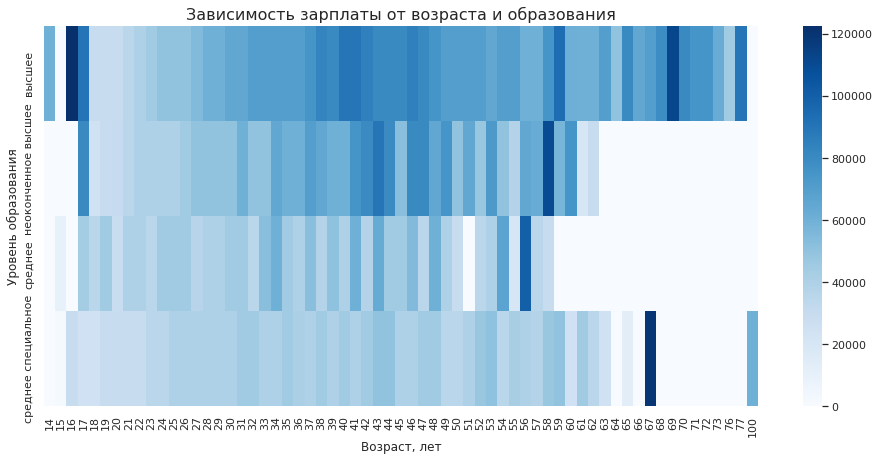

In [82]:
age_educated = hh_df[mask_emissions].pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(16,7)})
heatmap1 = sns.heatmap(data=age_educated, cmap='Blues');
heatmap1.set_xlabel('Возраст, лет', fontsize=12);
heatmap1.set_ylabel('Уровень образования', fontsize=12);
heatmap1.set_title('Зависимость зарплаты от возраста и образования', fontsize=16);

По графику видно, что внутри групп "среднее" и "среднее специальное" нет тенденций изменения зарплаты с возрастом. А внутри групп "неоконченное высшее" и "высшее" наблюдеется наличие карьерного роста увеличением возраста, и в группе "высшее" рост быстрее. Так же можно добавить, что в группе "среднее специальное" зпрплаты держатся на среднем уровнем во всех возрастах. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

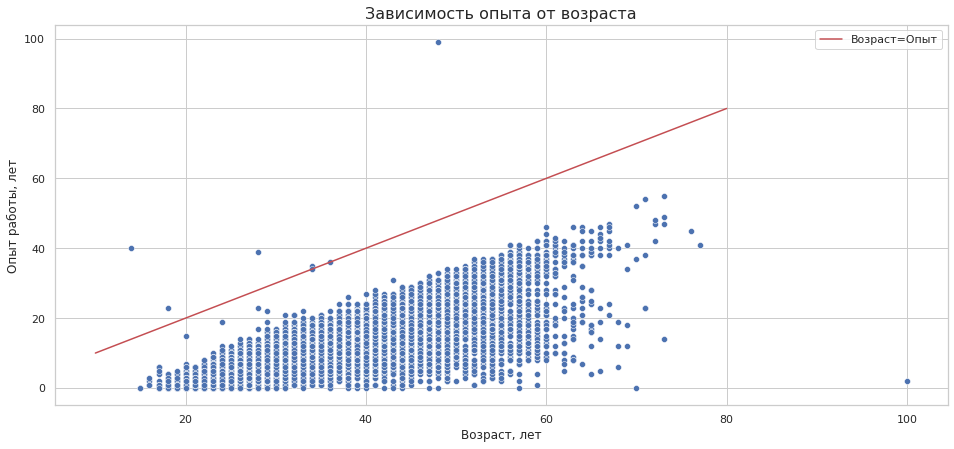

In [83]:
# создаём новый признак "Опыт работы (год)"
hh_df['Опыт работы (год)'] = round(hh_df['Опыт работы (месяц)']/12)

# построим диаграмму рассеяния зависимости опыта от возраста
sns.set_style('whitegrid')
fig = plt.figure(figsize=(16,7))
scatter1 = sns.scatterplot(data=hh_df[mask_emissions],
                           x='Возраст',
                           y='Опыт работы (год)'
);
scatter1.set_xlabel('Возраст, лет', fontsize=12);
scatter1.set_ylabel('Опыт работы, лет', fontsize=12);
scatter1.set_title('Зависимость опыта от возраста', fontsize=16);

# построим на графике прямую "Возраст=Опыт"
plt.plot([10,80], [10,80], 'r', label='Возраст=Опыт');
plt.legend();

Данные о соискателях у которых опыт работы больше или соответствует их возрасту являются выбросами.

Лично я бы считал выбросами и тех, у кого опыт работы начался раньше 10 лет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


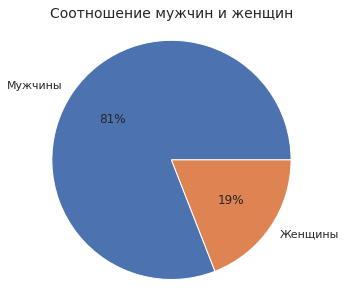

In [84]:
# выделим количество мужчин и женщин в переменную
gender = hh_df['Пол'].value_counts()

fig = plt.figure(figsize=(5,5))
colors_sns = sns.color_palette()
pie1 = plt.pie(
    gender,
    labels=['Мужчины', 'Женщины'],
    colors=colors_sns,
    autopct='%.0f%%',
    radius=1.1
);

plt.title('Cоотношение мужчин и женщин', fontsize=14);
plt.show();

По графику видно, что соискателей мужчин в 4 раза больше чем женщин.

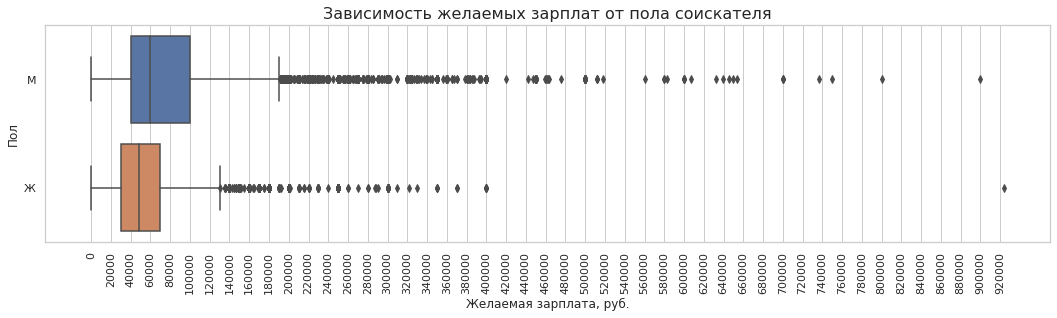

In [85]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(18,4))
plt.xticks(rotation=90)

boxplot5 = sns.boxplot(
    data=hh_df[mask_emissions],
    x='ЗП (руб)',
    y='Пол',
    orient='h',
    width=0.8
);
boxplot5.set_title('Зависимость желаемых зарплат от пола соискателя', fontsize=16);
boxplot5.set_xlabel('Желаемая зарплата, руб.', fontsize=12);
boxplot5.set_xticks(range(0, 940000, 20000));

По графику видно, что желаемая зарплата мужчин выше чем у женщин. Медианный уровень заработных плат у мужчин составляет 60 000 рублей, а 25% и 75% квартили составляют 40 000 и 100 000 рублей соответственно. А медианный уровень заработных плат у женщин составляет 48 000 рублей, 25% и 75% квартили составляют 30 000 и 70 000 рублей соответственно.

Зависимость этих признаков может быть полезна при построении модели. При принятии решения об использовании его, нужно будет учесть, кореллирует ли этот признак с другими, и определить его вклад в общую эфективность модели.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [86]:
# ответ на Задание 5.1
with_duplicates = hh_df.shape[0]
hh_df = hh_df.drop_duplicates()
without_duplicates = hh_df.shape[0]
duplicates_count = with_duplicates - without_duplicates
print(f'Удалось найти {duplicates_count} полную копию')

Удалось найти 161 полную копию


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [87]:
# выведем число пропусков в признаках, где они есть
print('Пропуски имеются в следующих признаках:')
cols_skips_counts = hh_df.isnull().sum()
print(cols_skips_counts[cols_skips_counts>0])

# ответ на задание 5.2
skips_count = hh_df.shape[0] - hh_df['Опыт работы (месяц)'].count()
print(f'В столбце "Опыт работы (месяц)" {skips_count} пропусков')

Пропуски имеются в следующих признаках:
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
Опыт работы (год)                  168
dtype: int64
В столбце "Опыт работы (месяц)" 168 пропусков


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [88]:
# заполним медианным значением пропуски в признаке "Опыт работы"
values = {
    'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median(),
    'Опыт работы (год)': hh_df['Опыт работы (год)'].median()
}
hh_df.fillna(values, inplace=True)

# удалим все строки с оставшимися пропусками
m = hh_df.shape[1]
hh_df.dropna(how='any', thresh=m, axis=0, inplace=True)

# ответ на задание 5.3
exp_mean = hh_df['Опыт работы (месяц)'].mean()
print(f'Среднее значение признака "Опыт работы (месяц)": {round(exp_mean)} месяцев')

Среднее значение признака "Опыт работы (месяц)": 114 месяцев


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [89]:
before_filtring = hh_df.shape[0]
# отфильтруем выбросы
current_salary = (hh_df['ЗП (руб)'] >= 1000) & (hh_df['ЗП (руб)'] <= 1000000)
hh_df = hh_df[current_salary]

# ответ на задание 5.4
after_filtring = hh_df.shape[0]
filtered_count = before_filtring - after_filtring
print(f'Отфильтровано {filtered_count} записей')

Отфильтровано 89 записей


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [90]:
before_filtring = hh_df.shape[0]

# отфильтруем выбросы
current_exp = hh_df['Опыт работы (год)'] < hh_df['Возраст']
hh_df = hh_df[current_exp]

# ответ на задание 5.5
after_filtring = hh_df.shape[0]
filtered_count = before_filtring - after_filtring
print(f'Отфильтровано {filtered_count} записей')

Отфильтровано 7 записей


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

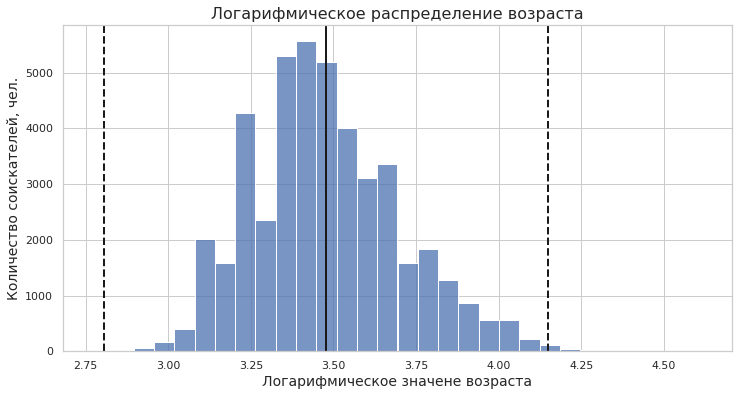

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
log_age = np.log(hh_df['Возраст'] + 1)
hist4 = sns.histplot(log_age, bins=30, ax=ax)
hist4.axvline(log_age.mean(), color='k', lw=2)
hist4.axvline(log_age.mean()+ 3 *log_age.std(), color='k', ls='--', lw=2)
hist4.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)

hist4.set_xlabel('Логарифмическое значене возраста', fontsize=14);
hist4.set_ylabel('Количество соискателей, чел.', fontsize=14);
hist4.set_title('Логарифмическое распределение возраста', fontsize=16);

Логарифмическое распределение имеет правостороннюю ассиметрию.

Нужно исходить из того, что значения не вошедшие в интервал, лежащие справа на графике не являются выбросами. Для того чтобы захватить их, мы делаем послабление на 1 сигму в правую сторону.

In [92]:
# ответ на задание 5.6
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_df, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482
